In [1]:
!sudo apt update
!apt-get install openjdk-8-jdk-headless -qq > /dev/null
#Check this site for the latest download link https://www.apache.org/dyn/closer.lua/spark/spark-3.2.1/spark-3.2.1-bin-hadoop3.2.tgz
!wget -q https://dlcdn.apache.org/spark/spark-3.2.1/spark-3.2.1-bin-hadoop3.2.tgz
!tar xf spark-3.2.1-bin-hadoop3.2.tgz
!pip install -q findspark
!pip install pyspark
!pip install py4j

import os
import sys
# os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
# os.environ["SPARK_HOME"] = "/content/spark-3.2.1-bin-hadoop3.2"


import findspark
findspark.init()
findspark.find()

Get:1 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease [3,632 B]
Hit:2 http://archive.ubuntu.com/ubuntu jammy InRelease
Get:3 http://security.ubuntu.com/ubuntu jammy-security InRelease [129 kB]
Get:4 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease [1,581 B]
Get:5 https://r2u.stat.illinois.edu/ubuntu jammy InRelease [6,555 B]
Get:6 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [128 kB]
Hit:7 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Hit:8 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Get:9 http://archive.ubuntu.com/ubuntu jammy-backports InRelease [127 kB]
Hit:10 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Get:11 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  Packages [1,676 kB]
Get:12 https://r2u.stat.illinois.edu/ubuntu jammy/main all Packages [8,939 kB]
Get:13 http://security.ubuntu.com/ubuntu jammy-sec

'/usr/local/lib/python3.11/dist-packages/pyspark'

In [2]:
import pyspark

from pyspark.sql import DataFrame, SparkSession
from typing import List
import pyspark.sql.types as T
import pyspark.sql.functions as F

spark= SparkSession \
       .builder \
       .appName("UltimateSpark") \
       .getOrCreate()

spark

In [ ]:
dataDictionary = [
        ('James',{'hair':'black','eye':'brown'}),
        ('Michael',{'hair':'brown','eye':None}),
        ('Robert',{'hair':'red','eye':'black'}),
        ('Washington',{'hair':'grey','eye':'grey'}),
        ('Jefferson',{'hair':'brown','eye':''})
        ]

df = spark.createDataFrame(data=dataDictionary, schema = ['name','properties'])
df.printSchema()
df.show(truncate=False)

root
 |-- name: string (nullable = true)
 |-- properties: map (nullable = true)
 |    |-- key: string
 |    |-- value: string (valueContainsNull = true)

+----------+-----------------------------+
|name      |properties                   |
+----------+-----------------------------+
|James     |{eye -> brown, hair -> black}|
|Michael   |{eye -> NULL, hair -> brown} |
|Robert    |{eye -> black, hair -> red}  |
|Washington|{eye -> grey, hair -> grey}  |
|Jefferson |{eye -> , hair -> brown}     |
+----------+-----------------------------+



In [ ]:
data = [("James","","Smith","36636","M",60000),
        ("Michael","Rose","","40288","M",70000),
        ("Robert","","Williams","42114","",400000),
        ("Maria","Anne","Jones","39192","F",500000),
        ("Jen","Mary","Brown","","F",0)]

columns = ["first_name","middle_name","last_name","v1","gender","salary"]
pysparkDF = spark.createDataFrame(data = data, schema = columns)
pysparkDF.printSchema()
pysparkDF.show(truncate=False)

root
 |-- first_name: string (nullable = true)
 |-- middle_name: string (nullable = true)
 |-- last_name: string (nullable = true)
 |-- dob: string (nullable = true)
 |-- gender: string (nullable = true)
 |-- salary: long (nullable = true)

+----------+-----------+---------+-----+------+------+
|first_name|middle_name|last_name|dob  |gender|salary|
+----------+-----------+---------+-----+------+------+
|James     |           |Smith    |36636|M     |60000 |
|Michael   |Rose       |         |40288|M     |70000 |
|Robert    |           |Williams |42114|      |400000|
|Maria     |Anne       |Jones    |39192|F     |500000|
|Jen       |Mary       |Brown    |     |F     |0     |
+----------+-----------+---------+-----+------+------+



In [ ]:
from pyspark.sql.types import StructType, StructField, StringType,IntegerType
dataStruct = [(("James","","Smith"),"36636","M","3000"), \
      (("Michael","Rose",""),"40288","M","4000"), \
      (("Robert","","Williams"),"42114","M","4000"), \
      (("Maria","Anne","Jones"),"39192","F","4000"), \
      (("Jen","Mary","Brown"),"","F","-1") \
]

schemaStruct = StructType([
        StructField('name', StructType([
             StructField('firstname', StringType(), True),
             StructField('middlename', StringType(), True),
             StructField('lastname', StringType(), True)
             ])),
          StructField('v1', StringType(), True),
         StructField('gender', StringType(), True),
         StructField('salary', StringType(), True)
         ])


df = spark.createDataFrame(data=dataStruct, schema = schemaStruct)
df.printSchema()
df.show(truncate=False)

root
 |-- name: struct (nullable = true)
 |    |-- firstname: string (nullable = true)
 |    |-- middlename: string (nullable = true)
 |    |-- lastname: string (nullable = true)
 |-- dob: string (nullable = true)
 |-- gender: string (nullable = true)
 |-- salary: string (nullable = true)

+--------------------+-----+------+------+
|name                |dob  |gender|salary|
+--------------------+-----+------+------+
|{James, , Smith}    |36636|M     |3000  |
|{Michael, Rose, }   |40288|M     |4000  |
|{Robert, , Williams}|42114|M     |4000  |
|{Maria, Anne, Jones}|39192|F     |4000  |
|{Jen, Mary, Brown}  |     |F     |-1    |
+--------------------+-----+------+------+



In [3]:
df = spark.read.csv('sample_data/california_housing_train.csv',inferSchema=True,header=True)

In [ ]:
df.printSchema()

root
 |-- longitude: double (nullable = true)
 |-- latitude: double (nullable = true)
 |-- housing_median_age: double (nullable = true)
 |-- total_rooms: double (nullable = true)
 |-- total_bedrooms: double (nullable = true)
 |-- population: double (nullable = true)
 |-- households: double (nullable = true)
 |-- median_income: double (nullable = true)
 |-- median_house_value: double (nullable = true)



In [ ]:
df.show(10)

+---------+--------+------------------+-----------+--------------+----------+----------+-------------+------------------+
|longitude|latitude|housing_median_age|total_rooms|total_bedrooms|population|households|median_income|median_house_value|
+---------+--------+------------------+-----------+--------------+----------+----------+-------------+------------------+
|  -114.31|   34.19|              15.0|     5612.0|        1283.0|    1015.0|     472.0|       1.4936|           66900.0|
|  -114.47|    34.4|              19.0|     7650.0|        1901.0|    1129.0|     463.0|         1.82|           80100.0|
|  -114.56|   33.69|              17.0|      720.0|         174.0|     333.0|     117.0|       1.6509|           85700.0|
|  -114.57|   33.64|              14.0|     1501.0|         337.0|     515.0|     226.0|       3.1917|           73400.0|
|  -114.57|   33.57|              20.0|     1454.0|         326.0|     624.0|     262.0|        1.925|           65500.0|
|  -114.58|   33.63|    

In [ ]:
df.total_rooms

Column<'total_rooms'>

In [ ]:
df.select(df.total_rooms).show(5)

+-----------+
|total_rooms|
+-----------+
|     5612.0|
|     7650.0|
|      720.0|
|     1501.0|
|     1454.0|
+-----------+
only showing top 5 rows



In [ ]:
df.select(df["total_rooms"]).show(5)

+-----------+
|total_rooms|
+-----------+
|     5612.0|
|     7650.0|
|      720.0|
|     1501.0|
|     1454.0|
+-----------+
only showing top 5 rows



In [ ]:
from pyspark.sql.functions import col
df.select(["*"]).show(3)

+---------+--------+------------------+-----------+--------------+----------+----------+-------------+------------------+
|longitude|latitude|housing_median_age|total_rooms|total_bedrooms|population|households|median_income|median_house_value|
+---------+--------+------------------+-----------+--------------+----------+----------+-------------+------------------+
|  -114.31|   34.19|              15.0|     5612.0|        1283.0|    1015.0|     472.0|       1.4936|           66900.0|
|  -114.47|    34.4|              19.0|     7650.0|        1901.0|    1129.0|     463.0|         1.82|           80100.0|
|  -114.56|   33.69|              17.0|      720.0|         174.0|     333.0|     117.0|       1.6509|           85700.0|
+---------+--------+------------------+-----------+--------------+----------+----------+-------------+------------------+
only showing top 3 rows



In [ ]:
df.select(df.total_rooms.alias("TotalRooms")).show(3)

+----------+
|TotalRooms|
+----------+
|    5612.0|
|    7650.0|
|     720.0|
+----------+
only showing top 3 rows



In [ ]:
df.orderBy(df.total_rooms.desc()).show(3)

+---------+--------+------------------+-----------+--------------+----------+----------+-------------+------------------+
|longitude|latitude|housing_median_age|total_rooms|total_bedrooms|population|households|median_income|median_house_value|
+---------+--------+------------------+-----------+--------------+----------+----------+-------------+------------------+
|  -117.74|   33.89|               4.0|    37937.0|        5471.0|   16122.0|    5189.0|       7.4947|          366300.0|
|  -121.79|   36.64|              11.0|    32627.0|        6445.0|   28566.0|    6082.0|       2.3087|          118800.0|
|  -117.78|   34.03|               8.0|    32054.0|        5290.0|   15507.0|    5050.0|       6.0191|          253900.0|
+---------+--------+------------------+-----------+--------------+----------+----------+-------------+------------------+
only showing top 3 rows



In [ ]:
df.select(df.total_rooms,df.population).orderBy(df.total_rooms.desc()).show(3)

+-----------+----------+
|total_rooms|population|
+-----------+----------+
|    37937.0|   16122.0|
|    32627.0|   28566.0|
|    32054.0|   15507.0|
+-----------+----------+
only showing top 3 rows



In [ ]:
df.select(df.median_income.cast("int")).show(4)

+-------------+
|median_income|
+-------------+
|            1|
|            1|
|            1|
|            3|
+-------------+
only showing top 4 rows



In [ ]:
df.select(df.total_rooms).where(df.median_income.between(3,10)).show(3)

+-----------+
|total_rooms|
+-----------+
|     1501.0|
|     1387.0|
|     2478.0|
+-----------+
only showing top 3 rows



In [ ]:
df.select(df.total_rooms).where(df.total_rooms.isin(1501,1387)).show(3)

+-----------+
|total_rooms|
+-----------+
|     1501.0|
|     1387.0|
|     1387.0|
+-----------+
only showing top 3 rows



In [ ]:
from pyspark.sql import Row



+---+--------+
| id|   value|
+---+--------+
|  1|Training|
+---+--------+



In [4]:
dfTest = spark.read.csv('sample_data/california_housing_test.csv',inferSchema=True,header=True)

In [5]:
dfTest.select(dfTest.longitude,dfTest.latitude).show(4)

+---------+--------+
|longitude|latitude|
+---------+--------+
|  -122.05|   37.37|
|   -118.3|   34.26|
|  -117.81|   33.78|
|  -118.36|   33.82|
+---------+--------+
only showing top 4 rows



In [6]:
dfTest=dfTest.select(dfTest.longitude,dfTest.latitude).distinct()

ValueError: Cannot run multiple SparkContexts at once; existing SparkContext(app=UltimateSpark, master=local[*]) created by getOrCreate at <ipython-input-2-8800bcdda998>:11 

In [10]:
spark.sparkContext.addPyFile("https://raw.githubusercontent.com/gbrueckl/Fabric.Toolbox/main/DataEngineering/Library/VisualizeExecutionPlan.py")
from VisualizeExecutionPlan import show_plan

Loading VisualizeExecutionPlan library ...


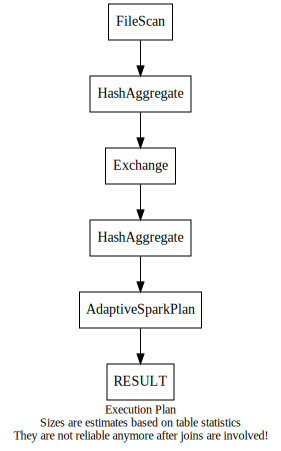

In [12]:
show_plan(dfTest)

In [ ]:
help(df.join)

Help on method join in module pyspark.sql.dataframe:

join(other: 'DataFrame', on: Union[str, List[str], pyspark.sql.column.Column, List[pyspark.sql.column.Column], NoneType] = None, how: Optional[str] = None) -> 'DataFrame' method of pyspark.sql.dataframe.DataFrame instance
    Joins with another :class:`DataFrame`, using the given join expression.
    
    .. versionadded:: 1.3.0
    
    .. versionchanged:: 3.4.0
        Supports Spark Connect.
    
    Parameters
    ----------
    other : :class:`DataFrame`
        Right side of the join
    on : str, list or :class:`Column`, optional
        a string for the join column name, a list of column names,
        a join expression (Column), or a list of Columns.
        If `on` is a string or a list of strings indicating the name of the join column(s),
        the column(s) must exist on both sides, and this performs an equi-join.
    how : str, optional
        default ``inner``. Must be one of: ``inner``, ``cross``, ``outer``,
      

In [ ]:
df.join(dfTest,(df.longitude==dfTest.longitude) & (df.latitude==dfTest.latitude),'inner').show(5)

+---------+--------+------------------+-----------+--------------+----------+----------+-------------+------------------+---------+--------+
|longitude|latitude|housing_median_age|total_rooms|total_bedrooms|population|households|median_income|median_house_value|longitude|latitude|
+---------+--------+------------------+-----------+--------------+----------+----------+-------------+------------------+---------+--------+
|  -115.49|   32.67|              29.0|     1523.0|         440.0|    1302.0|     393.0|       1.1311|           84700.0|  -115.49|   32.67|
|  -115.49|   32.67|              25.0|     2322.0|         573.0|    2185.0|     602.0|        1.375|           70100.0|  -115.49|   32.67|
|  -115.52|   32.98|              32.0|     1615.0|         382.0|    1307.0|     345.0|       1.4583|           58600.0|  -115.52|   32.98|
|  -115.56|   32.78|              46.0|     2511.0|         490.0|    1583.0|     469.0|       3.0603|           70800.0|  -115.56|   32.78|
|  -115.56|  

In [ ]:
df.join(dfTest,['longitude','latitude'],'inner').show(5)

+---------+--------+------------------+-----------+--------------+----------+----------+-------------+------------------+
|longitude|latitude|housing_median_age|total_rooms|total_bedrooms|population|households|median_income|median_house_value|
+---------+--------+------------------+-----------+--------------+----------+----------+-------------+------------------+
|  -115.49|   32.67|              29.0|     1523.0|         440.0|    1302.0|     393.0|       1.1311|           84700.0|
|  -115.49|   32.67|              25.0|     2322.0|         573.0|    2185.0|     602.0|        1.375|           70100.0|
|  -115.52|   32.98|              32.0|     1615.0|         382.0|    1307.0|     345.0|       1.4583|           58600.0|
|  -115.56|   32.78|              46.0|     2511.0|         490.0|    1583.0|     469.0|       3.0603|           70800.0|
|  -115.56|   32.78|              35.0|     1185.0|         202.0|     615.0|     191.0|       4.6154|           86200.0|
+---------+--------+----

In [ ]:
df.summary().show()

+-------+-------------------+------------------+------------------+-----------------+-----------------+------------------+-----------------+------------------+------------------+
|summary|          longitude|          latitude|housing_median_age|      total_rooms|   total_bedrooms|        population|       households|     median_income|median_house_value|
+-------+-------------------+------------------+------------------+-----------------+-----------------+------------------+-----------------+------------------+------------------+
|  count|              17000|             17000|             17000|            17000|            17000|             17000|            17000|             17000|             17000|
|   mean|-119.56210823529375|  35.6252247058827| 28.58935294117647|2643.664411764706|539.4108235294118|1429.5739411764705|501.2219411764706| 3.883578100000021|207300.91235294117|
| stddev| 2.0051664084260357|2.1373397946570867|12.586936981660406|2179.947071452777|421.4994515798648| 1

In [ ]:
from pyspark.sql.functions import *
df.select(avg(df.total_rooms)).show()

+-----------------+
| avg(total_rooms)|
+-----------------+
|2643.664411764706|
+-----------------+



In [ ]:
df.select(avg(df.total_rooms),min(df.total_rooms),max((df.total_rooms))).show()

+-----------------+----------------+----------------+
| avg(total_rooms)|min(total_rooms)|max(total_rooms)|
+-----------------+----------------+----------------+
|2643.664411764706|             2.0|         37937.0|
+-----------------+----------------+----------------+



In [ ]:
df.groupBy(df.longitude,df.latitude).avg('total_rooms').show(8)

+---------+--------+----------------+
|longitude|latitude|avg(total_rooms)|
+---------+--------+----------------+
|  -116.09|   34.15|          9444.0|
|  -116.31|   33.66|          4497.0|
|   -116.9|   33.22|          4132.0|
|  -116.96|   32.86|          3064.0|
|  -116.97|   32.76|          2765.5|
|  -116.99|   33.77|         10352.0|
|  -117.03|   33.18|          5391.0|
|  -117.19|   33.69|          6484.0|
+---------+--------+----------------+
only showing top 8 rows



In [ ]:
from pyspark.sql.functions import *
from pyspark.sql.window import *
windowPartition = Window.partitionBy(['latitude','longitude']).orderBy("total_rooms")
df.withColumn("rownum",row_number().over(windowPartition)).show(5)


+---------+--------+------------------+-----------+--------------+----------+----------+-------------+------------------+------+
|longitude|latitude|housing_median_age|total_rooms|total_bedrooms|population|households|median_income|median_house_value|rownum|
+---------+--------+------------------+-----------+--------------+----------+----------+-------------+------------------+------+
|  -117.04|   32.54|               7.0|      938.0|         297.0|    1187.0|     282.0|       1.2667|           67500.0|     1|
|  -117.09|   32.55|               8.0|     6533.0|        1217.0|    4797.0|    1177.0|       3.9583|          144400.0|     1|
|  -117.06|   32.55|               5.0|     3223.0|         940.0|    3284.0|     854.0|       1.4384|          108800.0|     1|
|  -117.04|   32.55|              15.0|     2206.0|         648.0|    2511.0|     648.0|       1.6348|           93200.0|     1|
|  -117.12|   32.56|              20.0|     2524.0|         682.0|    1819.0|     560.0|       2.

In [ ]:
from pyspark.sql.functions import *
from pyspark.sql.window import *
windowPartition = Window.partitionBy(['latitude']).orderBy("total_rooms")
df.withColumn("rownum",row_number().over(windowPartition)).show(5)

+---------+--------+------------------+-----------+--------------+----------+----------+-------------+------------------+------+
|longitude|latitude|housing_median_age|total_rooms|total_bedrooms|population|households|median_income|median_house_value|rownum|
+---------+--------+------------------+-----------+--------------+----------+----------+-------------+------------------+------+
|  -117.04|   32.54|               7.0|      938.0|         297.0|    1187.0|     282.0|       1.2667|           67500.0|     1|
|  -117.04|   32.55|              15.0|     2206.0|         648.0|    2511.0|     648.0|       1.6348|           93200.0|     1|
|  -117.06|   32.55|               5.0|     3223.0|         940.0|    3284.0|     854.0|       1.4384|          108800.0|     2|
|  -117.09|   32.55|               8.0|     6533.0|        1217.0|    4797.0|    1177.0|       3.9583|          144400.0|     3|
|  -117.05|   32.56|              17.0|      985.0|         233.0|     811.0|     223.0|        2

In [ ]:
df.withColumn('id',monotonically_increasing_id()).show(10)

+---------+--------+------------------+-----------+--------------+----------+----------+-------------+------------------+---+
|longitude|latitude|housing_median_age|total_rooms|total_bedrooms|population|households|median_income|median_house_value| id|
+---------+--------+------------------+-----------+--------------+----------+----------+-------------+------------------+---+
|  -114.31|   34.19|              15.0|     5612.0|        1283.0|    1015.0|     472.0|       1.4936|           66900.0|  0|
|  -114.47|    34.4|              19.0|     7650.0|        1901.0|    1129.0|     463.0|         1.82|           80100.0|  1|
|  -114.56|   33.69|              17.0|      720.0|         174.0|     333.0|     117.0|       1.6509|           85700.0|  2|
|  -114.57|   33.64|              14.0|     1501.0|         337.0|     515.0|     226.0|       3.1917|           73400.0|  3|
|  -114.57|   33.57|              20.0|     1454.0|         326.0|     624.0|     262.0|        1.925|           65500

In [ ]:
df.select(df.latitude,sha1(df.longitude.cast('string'))).show(5)

+--------+-------------------------------+
|latitude|sha1(CAST(longitude AS STRING))|
+--------+-------------------------------+
|   34.19|           bbfd561c970711cb4...|
|    34.4|           4780ba04fe9b76321...|
|   33.69|           ec15d7818706bdcb2...|
|   33.64|           750f79fb96bd9697c...|
|   33.57|           750f79fb96bd9697c...|
+--------+-------------------------------+
only showing top 5 rows

